### Etapa 1
Análise exploratória dos dados
Dataset: Medical Text Dataset - Cancer Doc 
Alunos: Adson Borges, Victor Fidelis

In [107]:
#pip install WordCloud
#!pip install seaborn

SyntaxError: invalid syntax (1073290119.py, line 3)

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
from tqdm import trange

df=pd.read_csv('CancerDocClassification.csv', encoding='latin1')
df = df.iloc[:,1:3]
df.columns=['labels','text']
df.head()


,labels,text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [126]:
df['labels'].value_counts()

labels
Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: count, dtype: int64

In [127]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['labels'])
df.head()

,labels,text
0,2,Thyroid surgery in children in a single insti...
1,2,""" The adopted strategy was the same as that us..."
2,2,coronary arterybypass grafting thrombosis ï¬b...
3,2,Solitary plasmacytoma SP of the skull is an u...
4,2,This study aimed to investigate serum matrix ...


In [128]:
df.isnull().sum()

labels    0
text      0
dtype: int64

In [129]:
df.duplicated().sum()

6574

In [130]:
df = df.drop_duplicates(keep='first')
df= df.reset_index(drop=True)
df.duplicated().sum()



0

In [131]:
df.shape

(996, 2)

In [132]:
tmp = df['labels'].value_counts()
tmp

labels
1    452
2    283
0    261
Name: count, dtype: int64

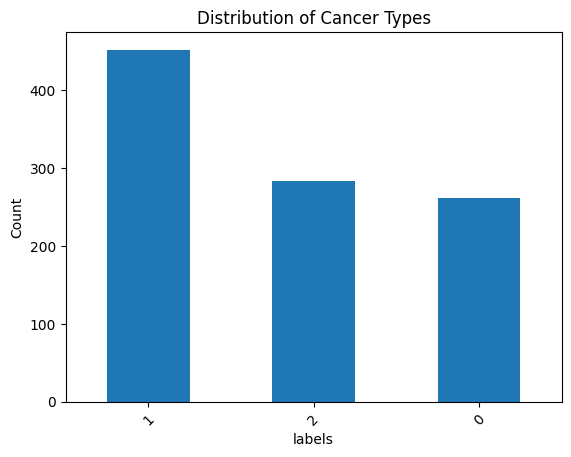

In [133]:
tmp.plot(kind='bar')
plt.ylabel('Count')
plt.title('Distribution of Cancer Types')
plt.xticks(rotation=45)
plt.show()

In [134]:
import string

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','', string.punctuation))
    return text

df['text'] = df['text'].apply(clean_text)

print(df)


     labels                                               text
0         2  thyroid surgery in  children in a single insti...
1         2   the adopted strategy was the same as that use...
2         2  coronary arterybypass grafting thrombosis ï¬b...
3         2   solitary plasmacytoma sp of the skull is an u...
4         2   this study aimed to investigate serum matrix ...
..      ...                                                ...
991       1  missense mutation distribution in the exons an...
992       1  versus gemcitabinecarboplatin in advanced nons...
993       2   keloids are pathological scars that grow over...
994       0  the anization of cells into multiple membranou...
995       0  several immunotherapeutic strategies that harn...

[996 rows x 2 columns]


In [135]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [136]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

stop_words = set(stopwords.words('english'))
stop_words.add("\x93")

lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    words = word_tokenize(text)  # Tokenizar o texto
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remover stopwords
    lemmatized_words = [lemmatizer.lemmatize(words) for words in filtered_words]  # Lemmatizar
    return lemmatized_words

# Aplicar a função ao DataFrame
df['tokens'] = df['text'].apply(preprocess_text)

print(df)

     labels                                               text  \
0         2  thyroid surgery in  children in a single insti...   
1         2   the adopted strategy was the same as that use...   
2         2  coronary arterybypass grafting thrombosis ï¬b...   
3         2   solitary plasmacytoma sp of the skull is an u...   
4         2   this study aimed to investigate serum matrix ...   
..      ...                                                ...   
991       1  missense mutation distribution in the exons an...   
992       1  versus gemcitabinecarboplatin in advanced nons...   
993       2   keloids are pathological scars that grow over...   
994       0  the anization of cells into multiple membranou...   
995       0  several immunotherapeutic strategies that harn...   

                                                tokens  
0    [thyroid, surgery, child, single, institution,...  
1    [adopted, strategy, used, prior, year, based, ...  
2    [coronary, arterybypass, grafti

In [137]:
from nltk.tokenize.treebank import TreebankWordDetokenizer


def detoken(text):
    word = TreebankWordDetokenizer().detokenize(text)
    return word

def corpus(text):
    text_list = text.split()
    return text_list

df['tokens'] = df['tokens'].apply(detoken)
df['text_list'] = df['tokens'].apply(corpus)
df.head()

corpus = []
for i in trange(df.shape[0], ncols = 150, nrows = 10, colour = 'green', smoothing = 0.8):
    corpus += df['text_list'][i]
len(corpus)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 996/996 [00:00<00:00, 7058.36it/s]


2126335

In [138]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('cell', 25347),
 ('cancer', 19807),
 ('patient', 16727),
 ('study', 12300),
 ('expression', 9739),
 ('tumor', 8822),
 ('gene', 8153),
 ('lung', 7850),
 ('analysis', 6765),
 ('data', 6720)]

In [139]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

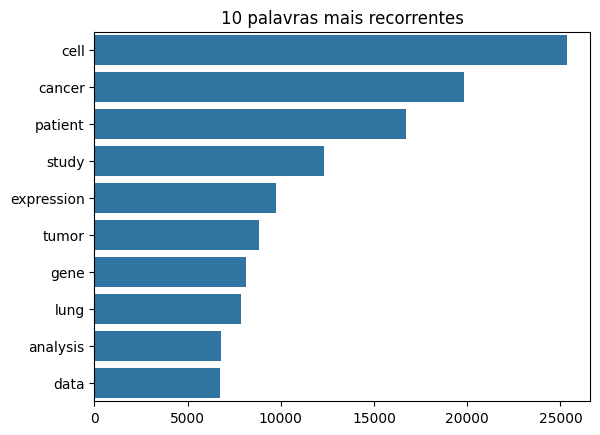

In [140]:
sns.barplot(x=freq, y=words)
plt.title('10 palavras mais recorrentes')
plt.show()

In [145]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams=cv.fit_transform(df['tokens'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('10 bigramas mais recorrentes')
plt.show()


MemoryError: Unable to allocate 8.91 GiB for an array with shape (996, 1200867) and data type int64